# Advanced Regression task: Predicting track "popularity" 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
# Importing the cleaning dataset
df_imported = pd.read_csv(r"\final_clean_dataset.csv")


genres = df_imported['genre'].unique()
mapping_genres = {}

i= 1
# mapping genre
for element in genres:
    mapping_genres[element] = i
    i+=1

df_imported['genre'] = df_imported['genre'].map(mapping_genres)

data = ['duration_ms','danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
        'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'genre',
 'explicit', 'time_signature']
# 'explicit', 'time_signature --> Are considered not important from the regressor


df = df_imported[data].copy()

##### Different subsets we will utilize

In [4]:
X = df[data].values
y = np.array(df_imported['popularity'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test_new, X_val, y_test_new, y_val = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

In [6]:
X_5 = df_imported[['average_artists_popularity',
       'sum_of_followers', 'genre','energy', 'danceability',]].values
y_5 = np.array(df_imported['popularity'])

In [7]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.3, random_state=42)
X_test_new_5, X_val_5, y_test_new_5, y_val_5 = train_test_split(X_test_5, y_test_5, test_size=0.8, random_state=42)

In [8]:
X_3 = df_imported[['average_artists_popularity',
       'sum_of_followers', 'genre']].values
y_3 = np.array(df_imported['popularity'])

In [9]:
X_train_3, X_test_3, y_train_3, y_test_3= train_test_split(X_3, y_3, test_size=0.3, random_state=42)
X_test_new_3, X_val_3, y_test_new_3, y_val_3 = train_test_split(X_test_3, y_test_3, test_size=0.8, random_state=42)

### Random Forest regression (Bagging)

Evaluation
Root Mean Squared Error (RMSE)
Submissions are scored on the root mean squared error. RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:

RMSE=√1n∑i=1n(yi−y^i)2,
where y hat is the predicted value and y is the original value.

## Selecting best features

In [8]:
X_f, y_f = df.iloc[:, 1:15].values, df_imported['popularity'].values


X_trainForBestFeatures, X_testForBestFeatures, y_trainForBestFeatures, y_testForBestFeatures = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0,
)


For finding best features among others. We used random forest classifier in order to get the best features. 

In [19]:
feat_labels = df.columns
forest = RandomForestRegressor(n_estimators=500,
                               verbose=2,
                                random_state=1)

forest.fit(X_trainForBestFeatures, y_trainForBestFeatures)

# Most important features
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_trainForBestFeatures.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 15, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   31.1s


building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  2.2min


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  4.9min


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500


### Features Importances

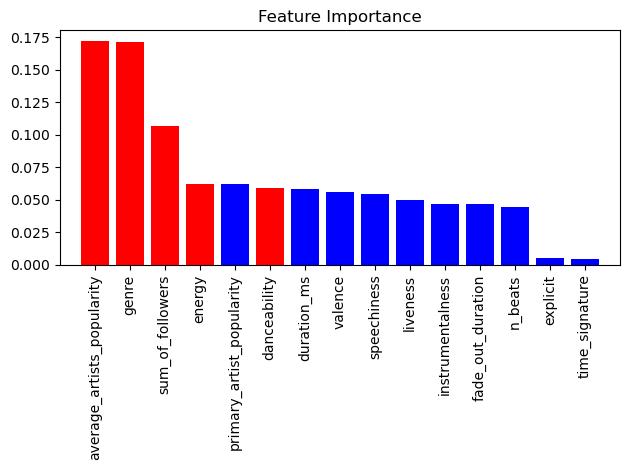

In [33]:
colors =['blue' if 'primary_artist_popularity' in feat_labels[indices[i]] else
        'red' if importances[indices[i]] >= 0.0589 else
        'blue'
         for i in range(len(feat_labels))]


plt.title('Feature Importance')
plt.bar(range(X_trainForBestFeatures.shape[1]), 
        importances[indices],
        color = colors,
        align='center')

plt.xticks(range(X_trainForBestFeatures.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_trainForBestFeatures.shape[1]])
plt.tight_layout()

plt.show()

#### Models (12 Features)

In [91]:
# Best configuration

from sklearn.metrics import mean_squared_error, r2_score

# Define the regressor
clf = RandomForestRegressor(n_estimators=1000,
                             bootstrap= True,
                             max_depth=30, 
                             min_samples_split=4, 
                             min_samples_leaf=3, 
                             min_weight_fraction_leaf=0.00015, 
                             random_state=42,
                             oob_score=True,
                             #verbose = 1,
                             n_jobs=-1)

# Training
clf.fit(X_train, y_train)

# Training evaluation
y_pred_train = clf.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print('Training MSE: {:.4f}'.format(train_mse))
print('Training R^2: {:.4f}'.format(train_r2))


# validation
y_pred_val= clf.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print('Val MSE: {:.4f}'.format(val_mse))
print('Val R^2: {:.4f}'.format(val_r2))

Training MSE: 122.4651
Training R^2: 0.7313
Val MSE: 239.0590
Val R^2: 0.4802


In [92]:
# Test
y_pred_test= clf.predict(X_test_new)
test_mse = mean_squared_error(y_test_new, y_pred_test)
test_r2 = r2_score(y_test_new, y_pred_test)

print('Val MSE: {:.4f}'.format(test_mse))
print('Val R^2: {:.4f}'.format(test_r2))

Val MSE: 242.6163
Val R^2: 0.4628


#### Models (3 Features)

In [106]:
# Best configuration
from sklearn.metrics import mean_squared_error, r2_score

# Define the regressor
clf = RandomForestRegressor(n_estimators=1000,
                             bootstrap= True,
                             max_depth=20, 
                             min_samples_split=3, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.00015, 
                             random_state=42,
                             oob_score=True,
                             #verbose = 1,
                             n_jobs=-1)

# Training
clf.fit(X_train_3, y_train_3)

# Training evaluation
y_pred_train_3 = clf.predict(X_train_3)
train_mse_3 = mean_squared_error(y_train_3, y_pred_train_3)
train_r2_3 = r2_score(y_train_3, y_pred_train_3)

print('Training MSE: {:.4f}'.format(train_mse_3))
print('Training R^2: {:.4f}'.format(train_r2_3))

# validation
y_pred_val_3= clf.predict(X_val_3)
val_mse_3 = mean_squared_error(y_val_3, y_pred_val_3)
val_r2_3 = r2_score(y_val_3, y_pred_val_3)

print('Val MSE: {:.4f}'.format(val_mse_3))
print('Val R^2: {:.4f}'.format(val_r2_3))

Training MSE: 179.1905
Training R^2: 0.6068
Val MSE: 230.2038
Val R^2: 0.4994


In [94]:
# Test
y_pred_test_3= clf.predict(X_test_new_3)
test_mse_3 = mean_squared_error(y_test_new_3, y_pred_test_3)
test_r2_3 = r2_score(y_test_new_3, y_pred_test_3)

print('Val MSE: {:.4f}'.format(test_mse_3))
print('Val R^2: {:.4f}'.format(test_r2_3))

Val MSE: 234.8398
Val R^2: 0.4801


#### Models (5 Features)

In [104]:
# Best configuration
from sklearn.metrics import mean_squared_error, r2_score

# Define the regressor
clf = RandomForestRegressor(n_estimators=1000,
                             bootstrap= True,
                             max_depth=20, 
                             min_samples_split=3, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.00015, 
                             random_state=42,
                             oob_score=True,
                             verbose = 1,
                             n_jobs=-1)

# Training
clf.fit(X_train_5, y_train_5)

# Training evaluation
y_pred_train_5 = clf.predict(X_train_5)
train_mse_5 = mean_squared_error(y_train_5, y_pred_train_5)
train_r2_5 = r2_score(y_train_5, y_pred_train_5)

print('Training MSE: {:.4f}'.format(train_mse_5))
print('Training R^2: {:.4f}'.format(train_r2_5))

# validation
y_pred_val_5= clf.predict(X_val_5)
val_mse_5 = mean_squared_error(y_val_5, y_pred_val_5)
val_r2_5 = r2_score(y_val_5, y_pred_val_5)

print('Val MSE: {:.4f}'.format(val_mse_5))
print('Val R^2: {:.4f}'.format(val_r2_5))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.7s finished


Training MSE: 152.8409
Training R^2: 0.6646


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s


Val MSE: 233.6814
Val R^2: 0.4919


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [105]:
# Test
y_pred_test_5= clf.predict(X_test_new_5)
test_mse_5 = mean_squared_error(y_test_new_5, y_pred_test_5)
test_r2_5 = r2_score(y_test_new_5, y_pred_test_5)

print('Val MSE: {:.4f}'.format(test_mse_5))
print('Val R^2: {:.4f}'.format(test_r2_5))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s


Val MSE: 239.7836
Val R^2: 0.4691


[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [86]:
len(y_test_new)

5280

In [ ]:
Training MSE: 138.5636
Training R^2: 0.6964
Score of model: 0.6964
Val MSE: 216.2979
Val R^2: 0.5328
Score of model: 0.5328


from sklearn.metrics import mean_squared_error, r2_score

# Define the regressor
clf = RandomForestRegressor(n_estimators=1000,
                             bootstrap= True,
                             max_depth=30, 
                             min_samples_split=4, 
                             min_samples_leaf=3, 
                             min_weight_fraction_leaf=0.00015, 
                             random_state=42,
                             oob_score=True,
                             #verbose = 1,
                             n_jobs=-1)

# Training
clf.fit(X2_train, y2_train)

# Training evaluation
y2_pred_train = clf.predict(X2_train)
train_mse_2 = mean_squared_error(y2_train, y2_pred_train)
train_r2_2 = r2_score(y2_train, y2_pred_train)
#scoreOfModel_2 = clf.score(X2_train, y2_train)

print('Training MSE: {:.4f}'.format(train_mse_2))
print('Training R^2: {:.4f}'.format(train_r2_2))
#print('Score of model: {:.4f}'.format(scoreOfModel))

# test
y2_pred_test= clf.predict(X2_test)
test_mse_2 = mean_squared_error(y2_test, y2_pred_test)
test_r2_2 = r2_score(y2_test, y2_pred_test)
#scoreOfModelTest = clf.score(X2_test, y2_test)

print('Val MSE: {:.4f}'.format(test_mse_2))
print('Val R^2: {:.4f}'.format(test_r2_2))
#print('Score of model: {:.4f}'.format(scoreOfModelTest))

In [483]:
# test
y_pred_test= clf.predict(X_test_new)
test_mse = mean_squared_error(y_test_new, y_pred_test)
test_r2 = r2_score(y_test_new, y_pred_test)
scoreOfModelTest = clf.score(X_test_new, y_test_new)

print('Val MSE: {:.4f}'.format(test_mse))
print('Val R^2: {:.4f}'.format(test_r2))
print('Score of model: {:.4f}'.format(scoreOfModelTest))

##### Best model so far

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s


Val MSE: 225.0048
Val R^2: 0.5057
Score of model: 0.5057


[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


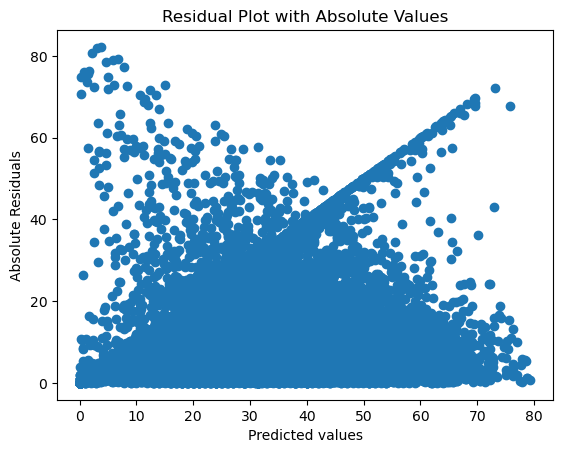

In [274]:
# Plot residuals vs predicted values
plt.scatter(y_pred_test, abs(y_test - y_pred_test))
plt.xlabel('Predicted values')
plt.ylabel('Absolute Residuals')
plt.title('Residual Plot with Absolute Values')
plt.show()

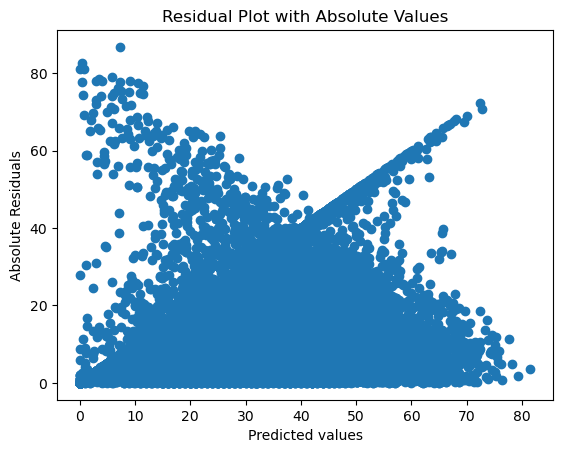

In [229]:
## Base regressor 
# Plot residuals vs predicted values
plt.scatter(y_pred_test, abs(y_test - y_pred_test))
plt.xlabel('Predicted values')
plt.ylabel('Absolute Residuals')
plt.title('Residual Plot with Absolute Values')
plt.show()

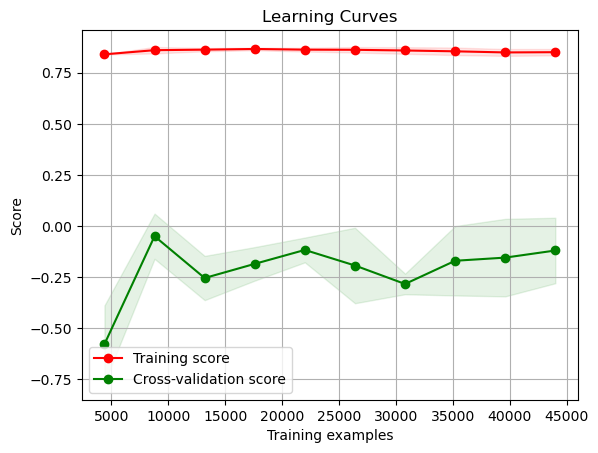

In [278]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf, X, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2', return_times=True)

# Compute mean scores and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

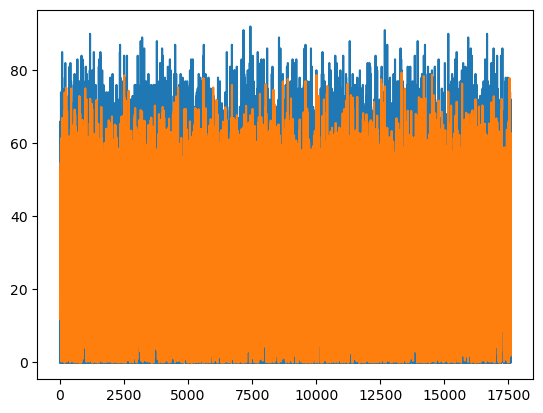

In [275]:
popularity = []
for pair in zip(y_test, y_pred_test):
    popularity.append(pair)

plt.plot(popularity)

### XGB regression (Boosting)

In [10]:
# Define the regressor
clf = XGBRegressor(n_estimators=100,
                   learning_rate=0.06,  # Similar to 'n_estimators' in Random Forest
                   max_depth=15,       # Similar to 'max_depth' in Random Forest
                   min_child_weight=1, # Similar to 'min_samples_leaf' in Random Forest
                   reg_lambda=10,       # Similar to 'min_weight_fraction_leaf' in Random Forest
                   subsample=1.0,      # Similar to 'bootstrap=True' in Random Forest
                   colsample_bytree=1.0, 
                   random_state=42,
                   verbosity=1,        # Similar to 'verbose=1' in Random Forest
                   n_jobs=-1)    
# Training
clf.fit(X_train, y_train)

# Training evaluation
y_pred_train = clf.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
print('Training MSE: {:.4f}'.format(train_mse))
print('Training R^2: {:.4f}'.format(train_r2))

# validation
y_pred_val= clf.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print('Val MSE: {:.4f}'.format(val_mse))
print('Val R^2: {:.4f}'.format(val_r2))

# Test
y_pred_test = clf.predict(X_test_new)
test_mse = mean_squared_error(y_test_new, y_pred_test)
test_r2 = r2_score(y_test_new, y_pred_test)
print('Test MSE: {:.4f}'.format(test_mse))
print('Test R^2: {:.4f}'.format(test_r2))

Training MSE: 63.1954
Training R^2: 0.8613
Val MSE: 235.5607
Val R^2: 0.4878
Test MSE: 238.7211
Test R^2: 0.4715


In [12]:
# Define the regressor
clf = XGBRegressor(n_estimators=100,
                   learning_rate=0.06,  # Similar to 'n_estimators' in Random Forest
                   max_depth=15,       # Similar to 'max_depth' in Random Forest
                   min_child_weight=1, # Similar to 'min_samples_leaf' in Random Forest
                   reg_lambda=10,       # Similar to 'min_weight_fraction_leaf' in Random Forest
                   subsample=1.0,      # Similar to 'bootstrap=True' in Random Forest
                   colsample_bytree=1.0, 
                   random_state=42,
                   verbosity=1,        # Similar to 'verbose=1' in Random Forest
                   n_jobs=-1)    
# Training
clf.fit(X_train_3, y_train_3)

# Training evaluation
y_pred_train_3 = clf.predict(X_train_3)
train_mse_3 = mean_squared_error(y_train_3, y_pred_train_3)
train_r2_3 = r2_score(y_train_3, y_pred_train_3)
print('Training MSE: {:.4f}'.format(train_mse_3))
print('Training R^2: {:.4f}'.format(train_r2_3))

# validation
y_pred_val_3 = clf.predict(X_val_3)
val_mse_3 = mean_squared_error(y_val_3, y_pred_val_3)
val_r2_3 = r2_score(y_val_3, y_pred_val_3)

print('Val MSE: {:.4f}'.format(val_mse_3))
print('Val R^2: {:.4f}'.format(val_r2_3))

# Test
y_pred_test_3 = clf.predict(X_test_new_3)
test_mse_3 = mean_squared_error(y_test_new_3, y_pred_test_3)
test_r2_3 = r2_score(y_test_new_3, y_pred_test_3)
print('Test MSE: {:.4f}'.format(test_mse_3))
print('Test R^2: {:.4f}'.format(test_r2_3))

Training MSE: 156.6976
Training R^2: 0.6562
Val MSE: 225.7373
Val R^2: 0.5091
Test MSE: 234.5145
Test R^2: 0.4808


In [17]:
# Define the regressor
clf = XGBRegressor(n_estimators=100,
                   learning_rate=0.06,  # Similar to 'n_estimators' in Random Forest
                   max_depth=15,       # Similar to 'max_depth' in Random Forest
                   min_child_weight=1, # Similar to 'min_samples_leaf' in Random Forest
                   reg_lambda=10,       # Similar to 'min_weight_fraction_leaf' in Random Forest
                   #subsample=1.0,      # Similar to 'bootstrap=True' in Random Forest
                   #colsample_bytree=1.0, 
                   random_state=42,
                   verbosity=1,        # Similar to 'verbose=1' in Random Forest
                   n_jobs=-1)    
# Training
clf.fit(X_train_5, y_train_5)

# Training evaluation
y_pred_train_5 = clf.predict(X_train_5)
train_mse_5 = mean_squared_error(y_train_5, y_pred_train_5)
train_r2_5 = r2_score(y_train_5, y_pred_train_5)
print('Training MSE: {:.4f}'.format(train_mse_5))
print('Training R^2: {:.4f}'.format(train_r2_5))

# validation
y_pred_val_5 = clf.predict(X_val_5)
val_mse_5 = mean_squared_error(y_val_5, y_pred_val_5)
val_r2_5 = r2_score(y_val_5, y_pred_val_5)

print('Val MSE: {:.4f}'.format(val_mse_5))
print('Val R^2: {:.4f}'.format(val_r2_5))

# Test
y_pred_test_5 = clf.predict(X_test_new_5)
test_mse_5 = mean_squared_error(y_test_new_5, y_pred_test_5)
test_r2_5 = r2_score(y_test_new_3, y_pred_test_5)
print('Test MSE: {:.4f}'.format(test_mse_5))
print('Test R^2: {:.4f}'.format(test_r2_5))

Training MSE: 103.3019
Training R^2: 0.7733
Val MSE: 234.2175
Val R^2: 0.4907
Test MSE: 240.9128
Test R^2: 0.4666
